In [ ]:
#first principle model for linear regression

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#X=np.array([0,1,2,2.5])
X=np.array([4,9,10,14,4,7,12,22,1,17])
m=len(X)
X=X.reshape(m,1)

print(X)

In [ ]:
#Y=np.array([1,1.9,3.2,3.4])
Y=np.array([31,58,65,73,37,44,60,91,21,84])
Y=Y.reshape(len(Y),1)
print(Y)

In [ ]:
plt.scatter(X,Y)

In [ ]:
#mean of X & Y
x_mean=np.mean(X)
y_mean=np.mean(Y)
print(x_mean)
print(y_mean)

In [ ]:
#finding summation
num=0
den=0
for i in range(m):
    num+=((X[i]-x_mean)*(Y[i]-y_mean))
    den+=((X[i]-x_mean)**2)
    
#finding a1 and a0
a1=num/den
a0=y_mean-a1*x_mean
print(a0)
print(a1)

In [ ]:
#finding predicted values for each value of X
y_pred1=a0+a1*X
print(y_pred1)

In [ ]:
#scatter plot
plt.scatter(X,Y,color='red')
plt.plot(X,y_pred1)

In [ ]:
residue=Y-y_pred1  #observed values-predicted values
print(residue)

In [ ]:
print('sum of residue',sum(residue))

In [ ]:
#calculating rmse
rmse=np.sqrt(sum(residue**2)/m)
rmse

In [ ]:
#plot of independent variable VS residual gives insights about the regression fit
plt.scatter(X,residue,color='blue')

In [ ]:
#compute r square

In [ ]:
r2=1-sum(residue**2)/sum((Y-y_mean)**2)
print('coeff of determination',r2)

# head brain data set

In [1]:
import os
import pandas as pd
import numpy as np
path=r"D:\term2\machine learning"


In [2]:
data=pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.shape

(237, 4)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from matplotlib import pyplot as plt

In [5]:
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values

In [6]:
m=len(x)
x=x.reshape((m,1))

In [7]:
# Model Intialization
lm = LinearRegression()
# Data Fitting
model = lm.fit(x,y)

print('a0 =',lm.intercept_)
print('a1 =',lm.coef_)

a0 = 325.5734210494426
a1 = [0.26342934]


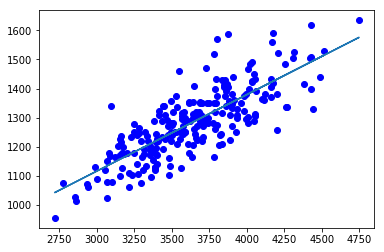

In [8]:
# Model is y= 325.5734 + 0.2634*x
# y Prediction
y_pred=lm.predict(x)
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred)

In [12]:
#model evaluation
rmse=np.sqrt(mean_squared_error(y,y_pred))
r_sq=r2_score(y,y_pred)  #built in function that computes r square value
print('rmse = ', rmse)
print('r2 score = ',r_sq)

rmse =  72.1206213783709
r2 score =  0.639311719957


In this case, R-Square is 63.9%. This means, 63.9% of variance in brain_weight
is explained by head-size. 
In other words, if you know head-size of a baby, you will have 63.9% information to make an accurate prediction about its brain-weight.

In [ ]:
#compute brain weight of a child whose head size is 4000
val_data=pd.DataFrame.from_dict({'Head Size(cm^3)':[4000]})
val_data
brain=lm.predict(val_data)
brain

In [13]:
#or
user_inp=[[int(input("enter the head size"))]]  
print('brainsize is',lm.predict(user_inp))

enter the head size6589
brainsize is [2061.30933895]


# salary data

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [41]:
sal=pd.read_csv('Salary_Data.csv')
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [42]:
x=sal['YearsExperience'].values
y=sal['Salary'].values

In [43]:
x=x.reshape((len(x),1))

In [44]:
#step 1: splitting data in to traning and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #random states keeps a fixes set of oututs to work with
len(x_train),len(x_test),len(y_train),len(y_test)

(24, 6, 24, 6)

The value of random_state parameter can be omitted. If we do not use that parameter, for every run of the code, we will get different train and test sets randomly. So, if we need to do multiple trials on the same data, we may not be able to do comparison. So, it is better to set it to some value.

Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code. And unless there is some other randomness present in the process, the results produced will be same as always. This helps in verifying the output.

In practice, one should set the random_state to some fixed number during testing phase. But then remove it in production if you really need a random (and not a fixed) split.

In [52]:
#create the model
lm1=LinearRegression()
#fit the model
model1=lm1.fit(x_train,y_train)
print('a0 = ',lm.intercept_)
print('a1 = ',lm.coef_)
y_pred=lm1.predict(x_test)

a0 =  325.5734210494426
a1 =  [0.26342934]


Text(0.5, 1.0, 'exp vs sal')

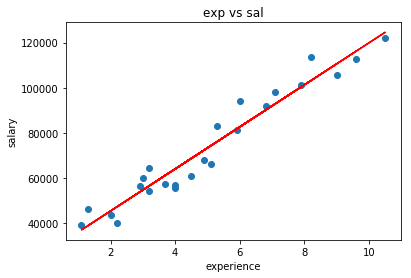

In [48]:
#visualizing training data set
plt.scatter(x_train,y_train)
plt.plot(x_train,lm1.predict(x_train),color='red')
plt.xlabel('experience')
plt.ylabel('salary')
plt.title('exp vs sal')

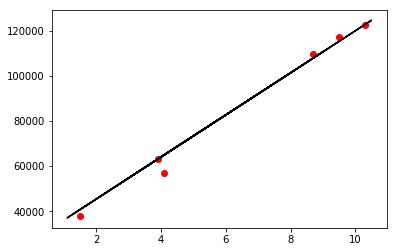

In [49]:
#visualising test data
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,lm1.predict(x_train),color='black')

In [53]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r_sq=r2_score(y_test,y_pred)  #always for score we have to fit test data and pred value
print('rmse = ', rmse)
print('r2 score = ',r_sq)

rmse =  3580.979237321343
r2 score =  0.988169515729126


r sq value is 98.8%.This means that 98% of variance in salary is explained by years of experience. so if uk the years of exp of a peson u have 98% info to make accurate prediction about that person's salary

In [54]:
user=[[int(input('enter years of experience'))]]
print('salary is ',lm1.predict(user))

enter years of experience9
salary is  [110593.27529119]


# Multivariate regression

In [55]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [56]:
student=pd.read_csv('student.csv')

In [57]:
student.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [58]:
x=student[['Math','Reading']]
y=student[['Writing']]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #random states keeps a fixes set of oututs to work with
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [60]:
#create the model
lm2=LinearRegression()
#fit the model
model2=lm2.fit(x_train,y_train)
print(lm2.intercept_)
print(lm2.coef_)
#predict the results for x_test
y_pred=model2.predict(x_test)
y_pred

[-1.9502733]
[[0.09356445 0.91854045]]


array([[62.82444064],
       [59.52453664],
       [76.99390932],
       [66.6686273 ],
       [37.52181801],
       [71.76335995],
       [72.17987002],
       [60.89379529],
       [66.14144872],
       [84.41869333],
       [67.05998917],
       [62.18659355],
       [83.50015288],
       [79.39237694],
       [67.60427182],
       [48.01712487],
       [42.03805989],
       [89.66634676],
       [68.05499001],
       [44.02806157],
       [87.17431469],
       [57.67035167],
       [55.1783196 ],
       [89.75991121],
       [66.20080504],
       [73.69400531],
       [70.64058653],
       [52.48205456],
       [61.28515716],
       [78.25249945],
       [96.39392736],
       [62.45018284],
       [50.22846359],
       [63.83654555],
       [65.65652239],
       [74.57833764],
       [65.11223975],
       [46.44363326],
       [66.87286027],
       [68.78640156],
       [52.68628753],
       [83.87441069],
       [96.50459587],
       [63.27515884],
       [61.17448864],
       [73

In [61]:
rmse2=np.sqrt(mean_squared_error(y_test,y_pred))
r=r2_score(y_test,y_pred)
print('rmse is ',rmse2)
print('r square is ',r)

rmse is  4.414674861496005
r square is  0.9052409628220129
